In [19]:
import utilities as ut
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sl_utilities import distinct_colours as dc
from sl_utilities import distance_functions
import os
import pickle


path="./data_pkl/" 
snap=596
simname = 'm12i_res7100_mhdcv'
simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/1Myr_fire2'
file_name="total_data_all_clusters_all_snapshots.pkl"
snapshot_start=596
snapshot_end=696



with open(path+file_name, "rb") as input:
    importdata = pickle.load(input)

print("Testing if the loading of data was successful !! \n")
print("x_tracked of snapshot 596 for cluster 1",importdata[596][1]["x_tracked"])
print("x_cm of snapshot 596 for cluster 1",importdata[596][1]["xcm"])
print("x_tracked of snapshot 597 for cluster 1",importdata[597][1]["x_tracked"])
print("x_cm of snapshot 597 for cluster 1",importdata[597][1]["xcm"])
print("x_tracked of snapshot 597 for cluster 2",importdata[597][2]["x_tracked"])
print("x_cm of snapshot 597 for cluster 2",importdata[597][2]["xcm"])



cluster_groupid=[]
total_clusters=len(importdata[snapshot_start])
for i in range(total_clusters):
    cluster_groupid.append("snapshot"+str(snapshot_start)+"_cluster_group"+str(i+1))

print("These are the clusters groups we have tracked data of:\n",cluster_groupid)

Testing if the loading of data was successful !! 

x_tracked of snapshot 596 for cluster 1 [-6.00513891 -6.00509183 -6.00239829 -6.01305976 -6.00702558 -6.00990916
 -6.00309596 -6.00452512 -6.0039977  -6.00854992 -6.00393315 -6.00829482
 -6.00636014 -6.00444464 -6.00841607 -6.00854442 -6.00197996 -6.00850992
 -6.00568745 -6.00840539 -6.00982215 -6.0013967  -6.00854318 -6.01197897
 -5.9995058  -5.99878137 -6.00698328 -6.00869882 -6.00844468 -6.00558671
 -6.00536959 -6.01049269 -6.00218807 -6.0006008  -6.00652576 -6.00544892
 -6.00667422 -6.00743993 -6.00588704 -6.00958322 -6.01424892 -6.00430563
 -6.00200992]
x_cm of snapshot 596 for cluster 1 -6.006235802999383
x_tracked of snapshot 597 for cluster 1 [-6.01601537 -6.01287714 -6.01442506 -5.99648041 -6.00928859 -6.01037169
 -6.01620249 -6.01430355 -6.01481366 -6.01071521 -6.00793953 -6.01023188
 -6.00759919 -6.01196177 -6.0119816  -6.01126726 -6.01338726 -6.01036839
 -6.01142382 -6.01040229 -6.00814754 -6.03227893 -6.01148209 -6.0074343

In [20]:
print(importdata[597][1].keys())

dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked'])


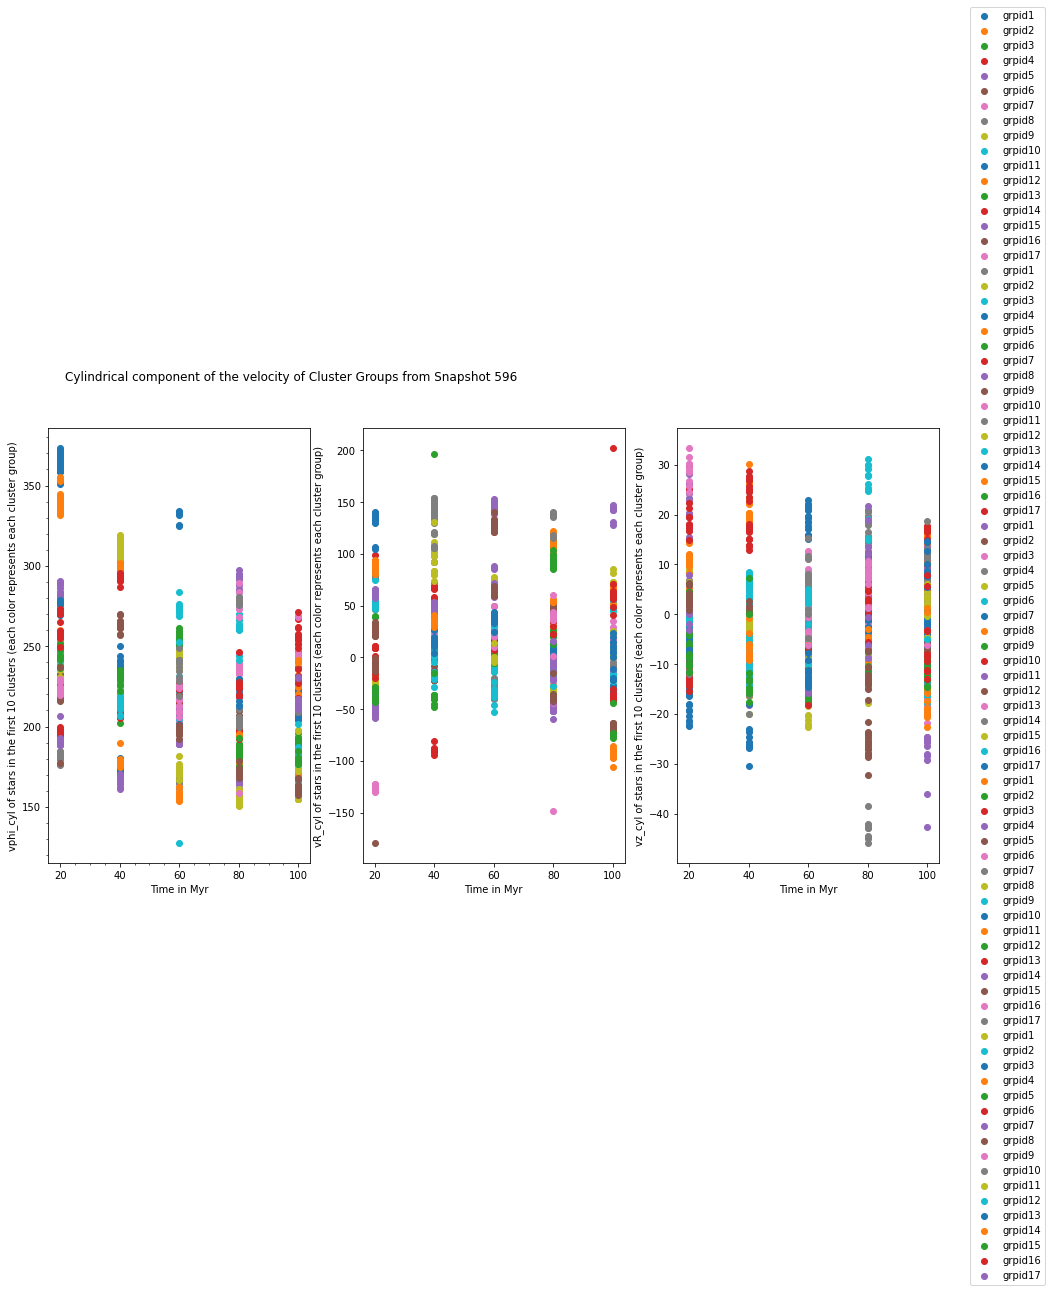

In [23]:
plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

fig1=plt.figure(figsize=(9,8))
fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
ax1=fig1.add_subplot(1,3,1)
ax2=fig1.add_subplot(1,3,2)
ax3=fig1.add_subplot(1,3,3)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax2.set_xlabel('Time in Myr')
ax3.set_xlabel('Time in Myr')
ax1.set_ylabel('vphi_cyl of stars in the first 10 clusters (each color represents each cluster group)')
ax2.set_ylabel('vR_cyl of stars in the first 10 clusters (each color represents each cluster group)')
ax3.set_ylabel('vz_cyl of stars in the first 10 clusters (each color represents each cluster group)')
#snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=[[20],[40],[60],[80],[100]] #these are the times we are interested in
n=snapshot_end-snapshot_start+1

for i in range(len(time)):
    cluster_count=0
    
    for j in range(total_clusters):
        
        vphi_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vphi_cyl_tracked"]
        vR_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vR_cyl_tracked"]
        vz_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vz_cyl_tracked"]
        vphi_x=time[i]*len(vphi_cyl)
        vR_x=time[i]*len(vR_cyl)
        vz_x=time[i]*len(vz_cyl)
        #print(x)
        s1=ax1.scatter(vphi_x,vphi_cyl,label="grpid"+str(cluster_count+1))
        s2=ax2.scatter(vR_x,vR_cyl,label=cluster_groupid[j])
        s3=ax3.scatter(vz_x,vz_cyl,label=cluster_groupid[j])
        #ax1.legend(loc='upper right')
        #ax1.legend(loc='upper right')
        ax1.legend(bbox_to_anchor=(3.5,0.5), loc='center left')
        cluster_count+=1   

fig1.subplots_adjust(right=1.5)    
#plt.tight_layout()
plt.show()
fig1.savefig(plot_path+"v_cylindrical_of stars_all_clusters.png",bbox_inches = 'tight',dpi=250)

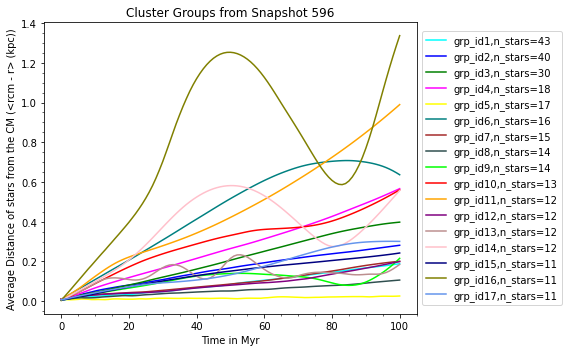

In [25]:
plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
#Now plotting the average distances from the center of mass for all snapshots we tracked in a single figure for all clusters
fig2=plt.figure(figsize=(8,5))
#fig2.suptitle("Cluster Groups from Snapshot 596")
ax1=fig2.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Average Distance of stars from the CM (<rcm - r> (kpc))')
ax1.set_title("Cluster Groups from Snapshot 596")
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    avg_r_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    for j in range(n):
        avg_r_cm_temp=np.append(avg_r_cm_temp,importdata[snapshot_count][cluster_count+1]["avg_delta_rxyz"])
        snapshot_count+=1
    avg_r_cm=avg_r_cm_temp[1:len(avg_r_cm_temp)]
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,avg_r_cm, 1)
    n_stars=len(importdata[snapshot_start][cluster_count+1]["x_tracked"])
    mass_sum=np.sum(importdata[snapshot_start][cluster_count+1]["mass_tracked"])
    ax1.plot(time,avg_r_cm,label="grp_id"+str(cluster_count+1)+",n_stars="+str(n_stars),c=colors[i])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
plt.tight_layout()
plt.show()
fig2.savefig(plot_path+"avg_delta_rxyz_all_clusters.png",dpi=150)
#########################################################
#########################################################

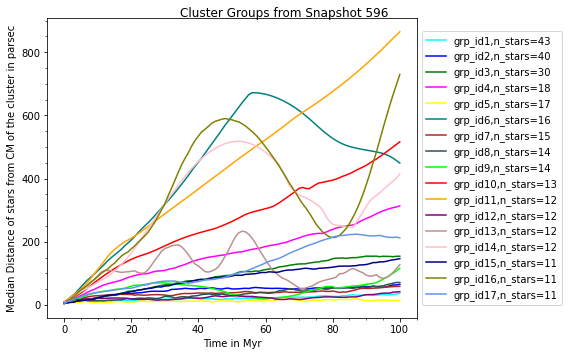

In [26]:
plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
##################################
#Now plotting the average distances from the center of mass for all snapshots we tracked in a single figure for all clusters
fig3=plt.figure(figsize=(8,5))
fig3.suptitle("Cluster Groups from Snapshot 596")
ax1=fig3.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Median Distance of stars from CM of the cluster in parsec')
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    median_delta_rxyz_temp=np.array(0)
    snapshot_count=snapshot_start
    for j in range(n):
        drxyz=importdata[snapshot_count][cluster_count+1]["delta_rxyz"]
        median_delta_rxyz_temp=np.append(median_delta_rxyz_temp,np.nanmedian(drxyz))
        snapshot_count+=1
    median_delta_rxyz=median_delta_rxyz_temp[1:len(median_delta_rxyz_temp)]*1000 #converted into parsec
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,avg_r_cm, 1)
    n_stars=len(importdata[snapshot_start][cluster_count+1]["x_tracked"])
    ax1.plot(time,median_delta_rxyz,label="grp_id"+str(cluster_count+1)+",n_stars="+str(n_stars),c=colors[i])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
plt.tight_layout()
plt.show()
fig3.savefig(plot_path+"median_delta_rxyz_all_clusters.png",dpi=150)
#########################################################
#########################################################

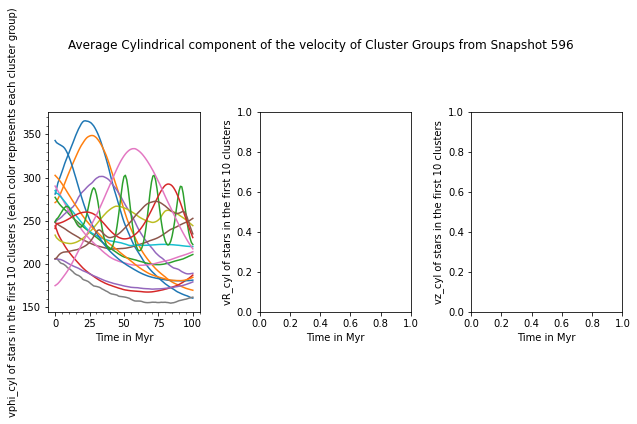

In [27]:
plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)


##################################
#Now plotting the average distances from the center of mass for all snapshots we tracked in a single figure for all clusters
fig4=plt.figure(figsize=(9,5))
fig4.suptitle("Average Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
ax1=fig4.add_subplot(1,3,1)
ax2=fig4.add_subplot(1,3,2)
ax3=fig4.add_subplot(1,3,3)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax2.set_xlabel('Time in Myr')
ax3.set_xlabel('Time in Myr')
ax1.set_ylabel('vphi_cyl of stars in the first 10 clusters (each color represents each cluster group)')
ax2.set_ylabel('vR_cyl of stars in the first 10 clusters')
ax3.set_ylabel('vz_cyl of stars in the first 10 clusters')
ax1.minorticks_on()

snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    median_vphi_cyl_temp=np.array(0)
    snapshot_count=snapshot_start
    for j in range(n):
        vphi=importdata[snapshot_count][cluster_count+1]["vphi_cyl_tracked"]
        median_vphi_cyl_temp=np.append(median_vphi_cyl_temp,np.nanmean(vphi))
        snapshot_count+=1
    median_vphi_cyl=median_vphi_cyl_temp[1:len(median_vphi_cyl_temp)]
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,median_vphi_cyl, 1)
    n_stars=len(importdata[snapshot_start][cluster_count+1]["vphi_cyl_tracked"])
    ax1.plot(time,median_vphi_cyl,label="grp_id"+str(cluster_count+1)+",n_stars="+str(n_stars))
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    #ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
fig4.tight_layout()
plt.show()
fig4.savefig(plot_path+"Average_Cylindrical_Velocities_all_Clusters.png",dpi=150)
#########################################################
#########################################################

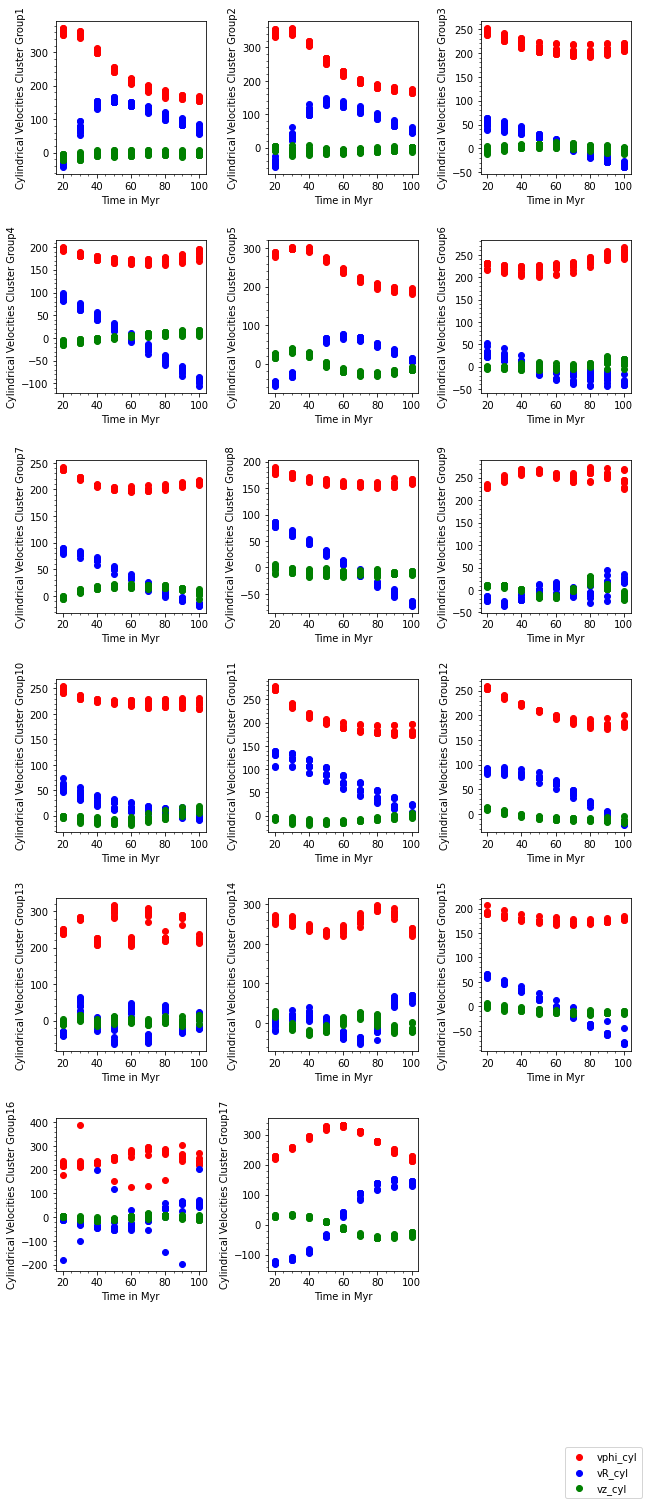

In [28]:
plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)



#ax2=fig1.add_subplot(1,3,2)
#ax3=fig1.add_subplot(1,3,3)

#ax2.set_xlabel('Time in Myr')
#ax3.set_xlabel('Time in Myr')

#ax2.set_ylabel('vR_cyl of stars in the first 10 clusters (each color represents each cluster group)')
#ax3.set_ylabel('vz_cyl of stars in the first 10 clusters (each color represents each cluster group)')
#snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
#time=[[20]] #these are the times we are interested in
n=snapshot_end-snapshot_start+1

total_subplots=total_clusters

position = range(1,total_subplots + 1)

cols=3
rows=total_subplots//cols
rows=rows+total_subplots%cols
fig5 = plt.figure(figsize=(9,rows*3))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
for i in range(total_clusters):
    ax = fig5.add_subplot(rows,cols,position[i])
    time=[[20],[30],[40],[50],[60],[70],[80],[90],[100]]
    for j in range(len(time)):
        vphi_cyl=importdata[time[j][0]+snapshot_start][cluster_count+1]["vphi_cyl_tracked"]
        vR_cyl=importdata[time[j][0]+snapshot_start][cluster_count+1]["vR_cyl_tracked"]
        vz_cyl=importdata[time[j][0]+snapshot_start][cluster_count+1]["vz_cyl_tracked"]
        vphi_x=time[j]*len(vphi_cyl)
        vR_x=time[j]*len(vR_cyl)
        vz_x=time[j]*len(vz_cyl)
        s1=ax.scatter(vphi_x,vphi_cyl,label="vphi_cyl",c="red")
        s2=ax.scatter(vR_x,vR_cyl,label="vR_cyl",c="blue")
        s3=ax.scatter(vz_x,vz_cyl,label="vz_cyl",c="green")
        ax.minorticks_on()
        ax.set_xlabel('Time in Myr')
        ax.set_ylabel("Cylindrical Velocities Cluster Group"+str(i+1))
        #ax1.legend(loc='upper right')
        #ax1.legend(loc='upper right')
        #ax.legend(bbox_to_anchor=(1.0,0.5), loc='center left')
        
    cluster_count+=1   
#fig1.subplots_adjust(right=1.5)    
fig5.legend((s1,s2,s3), ("vphi_cyl","vR_cyl","vz_cyl"),"lower right")
plt.tight_layout()
plt.show()
fig5.savefig(plot_path+"v_cylindrical_of_all_star_clusters.png",bbox_inches = 'tight',dpi=250)

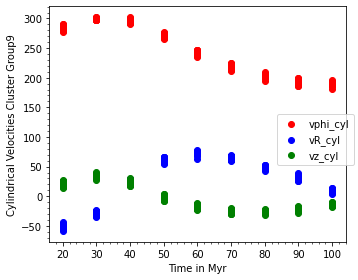

In [29]:
#generating plots for individual star clusters

plot_path="./plots_pkl/allculsters_single_figure/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

n=snapshot_end-snapshot_start+1

total_subplots=total_clusters

position = range(1,total_subplots + 1)
cluster_count=4
fig6 = plt.figure(figsize=(5,4))
ax = fig6.add_subplot(1,1,1)
time=[[20],[30],[40],[50],[60],[70],[80],[90],[100]]
for i in range(len(time)):
    vphi_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vphi_cyl_tracked"]
    vR_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vR_cyl_tracked"]
    vz_cyl=importdata[time[i][0]+snapshot_start][cluster_count+1]["vz_cyl_tracked"]
    vphi_x=time[i]*len(vphi_cyl)
    vR_x=time[i]*len(vR_cyl)
    vz_x=time[i]*len(vz_cyl)
    s1=ax.scatter(vphi_x,vphi_cyl,label="vphi_cyl",c="red")
    s2=ax.scatter(vR_x,vR_cyl,label="vR_cyl",c="blue")
    s3=ax.scatter(vz_x,vz_cyl,label="vz_cyl",c="green")
    ax.minorticks_on()
    ax.set_xlabel('Time in Myr')
    ax.set_ylabel("Cylindrical Velocities Cluster Group"+str(i+1))
       
#fig1.subplots_adjust(right=1.5)    
fig6.legend((s1,s2,s3), ("vphi_cyl","vR_cyl","vz_cyl"),"center right")
plt.tight_layout()
plt.show()
fig6.savefig(plot_path+"star_cluster5_v_cylindrical_.png",bbox_inches = 'tight',dpi=250)

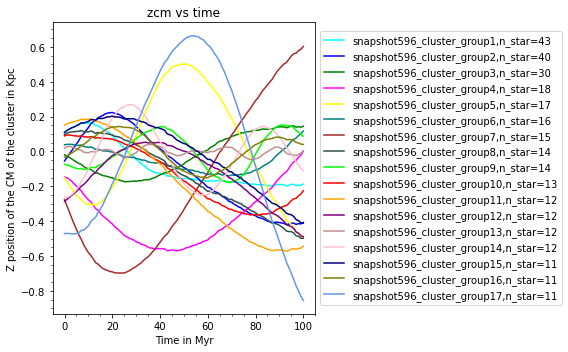

In [31]:
##################################
#Now plotting the average distances from the center of mass for all snapshots we tracked in a single figure for all clusters
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
fig7=plt.figure(figsize=(8,5))
ax1=fig7.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_title("zcm vs time")
ax1.set_ylabel('Z position of the CM of the cluster in Kpc')
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    z_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    n_star=len(importdata[snapshot_count][cluster_count+1]["x_tracked"])
    for j in range(n):
        z_cm_temp=np.append(z_cm_temp,importdata[snapshot_count][cluster_count+1]["zcm"])
        snapshot_count+=1
    z_cm=z_cm_temp[1:len(z_cm_temp)]
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,z_cm, 1)
    ax1.plot(time,z_cm,label=cluster_groupid[cluster_count]+",n_star="+str(n_star),c=colors[cluster_count])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
plt.tight_layout()
fig7.savefig(plot_path+"zcm_all_clusters.png",dpi=150)
#########################################################
#########################################################

['snapshot596_cluster_group1', 'snapshot596_cluster_group2', 'snapshot596_cluster_group3', 'snapshot596_cluster_group4', 'snapshot596_cluster_group5', 'snapshot596_cluster_group6', 'snapshot596_cluster_group7', 'snapshot596_cluster_group8', 'snapshot596_cluster_group9', 'snapshot596_cluster_group10', 'snapshot596_cluster_group11', 'snapshot596_cluster_group12', 'snapshot596_cluster_group13', 'snapshot596_cluster_group14', 'snapshot596_cluster_group15', 'snapshot596_cluster_group16', 'snapshot596_cluster_group17']


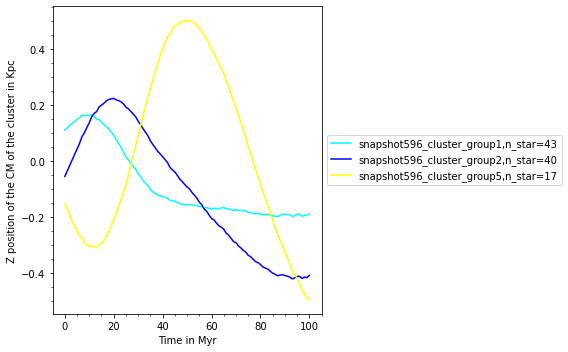

In [32]:
##################################
#Now plotting the z position of the CM of the stars in the clusters for the cluster 1,2 and 5 only
colors=['cyan','blue','green','magenta','yellow','teal','purple','tan','lime','brown']
print(cluster_groupid)
fig8=plt.figure(figsize=(8,5))
ax1=fig8.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Z position of the CM of the cluster in Kpc')
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    z_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    n_star=len(importdata[snapshot_count][cluster_count+1]["x_tracked"])
    for j in range(n):
        z_cm_temp=np.append(z_cm_temp,importdata[snapshot_count][cluster_count+1]["zcm"])
        snapshot_count+=1
    z_cm=z_cm_temp[1:len(z_cm_temp)]
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,z_cm, 1)
    if(cluster_count+1==1 or cluster_count+1==2 or cluster_count+1==5):
        ax1.plot(time,z_cm,label=cluster_groupid[cluster_count]+",n_star="+str(n_star),c=colors[cluster_count])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
plt.tight_layout()
fig8.savefig(plot_path+"zcm_one_two_five_clusters.png",dpi=150)
#########################################################
#########################################################

No handles with labels found to put in legend.
No handles with labels found to put in legend.


['snapshot596_cluster_group1', 'snapshot596_cluster_group2', 'snapshot596_cluster_group3', 'snapshot596_cluster_group4', 'snapshot596_cluster_group5', 'snapshot596_cluster_group6', 'snapshot596_cluster_group7', 'snapshot596_cluster_group8', 'snapshot596_cluster_group9', 'snapshot596_cluster_group10', 'snapshot596_cluster_group11', 'snapshot596_cluster_group12', 'snapshot596_cluster_group13', 'snapshot596_cluster_group14', 'snapshot596_cluster_group15', 'snapshot596_cluster_group16', 'snapshot596_cluster_group17']


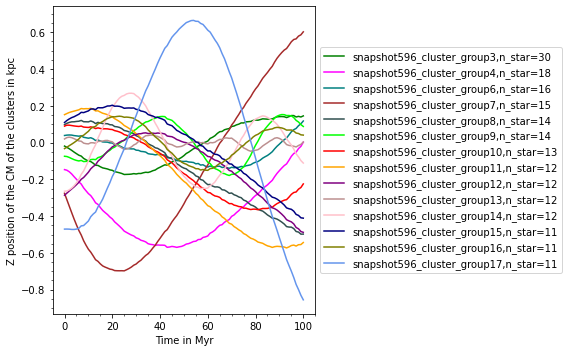

In [33]:
##################################
#Now plotting the z position of the CM of the stars in the clusters for the cluster 1,2 and 5 only
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
print(cluster_groupid)
fig9=plt.figure(figsize=(8,5))
ax1=fig9.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Z position of the CM of the clusters in kpc')
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    z_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    n_star=len(importdata[snapshot_count][cluster_count+1]["x_tracked"])
    for j in range(n):
        z_cm_temp=np.append(z_cm_temp,importdata[snapshot_count][cluster_count+1]["zcm"])
        snapshot_count+=1
    z_cm=z_cm_temp[1:len(z_cm_temp)]
    #print(avg_r_cm)
    slope, intercept = np.polyfit(time,z_cm, 1)
    if(((cluster_count+1)!=1) and ((cluster_count+1)!=2) and ((cluster_count+1)!=5)):
        ax1.plot(time,z_cm,label=cluster_groupid[cluster_count]+",n_star="+str(n_star),c=colors[cluster_count])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    ax1.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1
plt.tight_layout()
fig9.savefig(plot_path+"zcm__not_one_two_five_clusters.png",dpi=150)
#########################################################
#########################################################

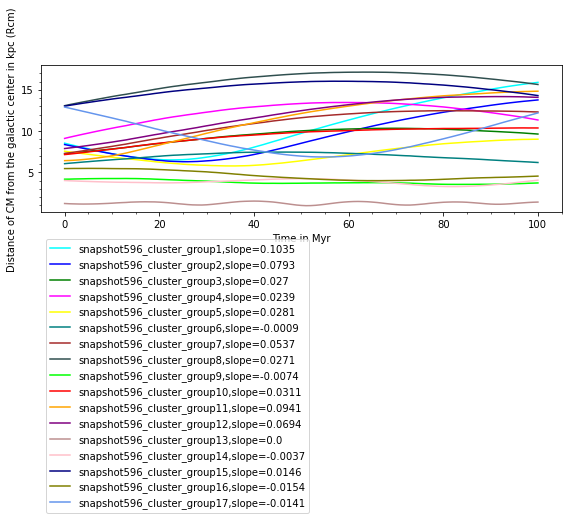

In [34]:
#########################################################
#########################################################
#plotting the distance of CM from the galactic center in each snapshot for all clusters (in kpc)
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
fig10=plt.figure(figsize=(8,7))
ax1=fig10.add_subplot(1,1,1)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Distance of CM from the galactic center in kpc (Rcm)')
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0
for i in range(len(cluster_groupid)):
    dist_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    for j in range(n):
        xcm=importdata[snapshot_count][cluster_count+1]["xcm"]
        ycm=importdata[snapshot_count][cluster_count+1]["ycm"]
        dis=(xcm**2+ycm**2)**(1/2) 
        dist_cm_temp=np.append(dist_cm_temp,dis)
        snapshot_count+=1
    dis_cm=dist_cm_temp[1:len(dist_cm_temp)]
    slope, intercept = np.polyfit(time,dis_cm, 1)
    ax1.plot(time,dis_cm,label=cluster_groupid[cluster_count]+",slope="+str(round(slope,4)),c=colors[cluster_count])
    #ax1.plot(time,slope*time+intercept,label=cluster_groupid[cluster_count]+"fitted")
    #ax1.legend(loc='upper right')
    ax1.legend(bbox_to_anchor=(0,-0.15), loc='upper left')
    cluster_count+=1
plt.tight_layout()    
fig10.savefig(plot_path+"clusters1_to_10_distance_of_CM_from_galactic_center_all_clusters.png",dpi=150)
#########################################################
#########################################################

<ipython-input-36-280f708ab12f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig11.add_subplot(rows,cols,position[plot_count])


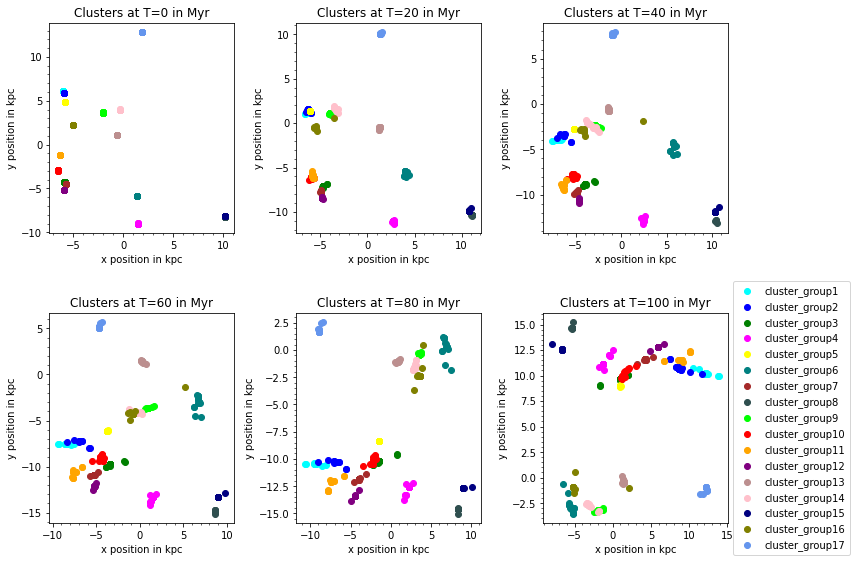

In [36]:
n=snapshot_end-snapshot_start+1
n_unflipped=n-5
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_subplots=6
total_clusters=17
position = range(1,total_subplots + 1)

cols=3
rows=2
#rows=rows+total_subplots%cols
fig11 = plt.figure(figsize=(12,rows*4))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
for i in range(total_clusters):
    time=[[0],[20],[40],[60],[80],[100]]
    plot_count=0
    for j in range(len(time)):
        ax = fig11.add_subplot(rows,cols,position[plot_count])
        x=importdata[time[j][0]+snapshot_start][cluster_count+1]["x_tracked"]
        y=importdata[time[j][0]+snapshot_start][cluster_count+1]["y_tracked"]
        xcm=importdata[time[j][0]+snapshot_start][cluster_count+1]["xcm"]
        ycm=importdata[time[j][0]+snapshot_start][cluster_count+1]["ycm"]
        z=importdata[time[j][0]+snapshot_start][cluster_count+1]["z_tracked"]
        
        s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
        #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
        ax.minorticks_on()
        ax.set_xlabel("x position in kpc")
        ax.set_ylabel("y position in kpc")
        ax.set_title("Clusters at T="+str(time[plot_count][0])+" in Myr")
        plot_count+=1
    
    ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    cluster_count+=1 
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
plt.tight_layout()
plt.show()
fig11.savefig(plot_path+"xvsy_all_Clusters_color_coded.png",bbox_inches='tight',dpi=250)

This is r, R and the difference between the spherical and cylindrial i.e. r-R
8.543007129445908 8.542280966579506 0.0007261628664014808
This is r, R and the difference between the spherical and cylindrial i.e. r-R
8.378185234749834 8.378008344343753 0.00017689040608104278
This is r, R and the difference between the spherical and cylindrial i.e. r-R
7.267638836528599 7.267613907013332 2.4929515267224645e-05
This is r, R and the difference between the spherical and cylindrial i.e. r-R
9.12105922199154 9.11987390806396 0.001185313927580367
This is r, R and the difference between the spherical and cylindrial i.e. r-R
7.5697538399392625 7.568254165173596 0.00149967476566637
This is r, R and the difference between the spherical and cylindrial i.e. r-R
6.057719408474656 6.057596706019052 0.00012270245560408455
This is r, R and the difference between the spherical and cylindrial i.e. r-R
7.3022266444440085 7.297008734559644 0.005217909884364325
This is r, R and the difference between the spher

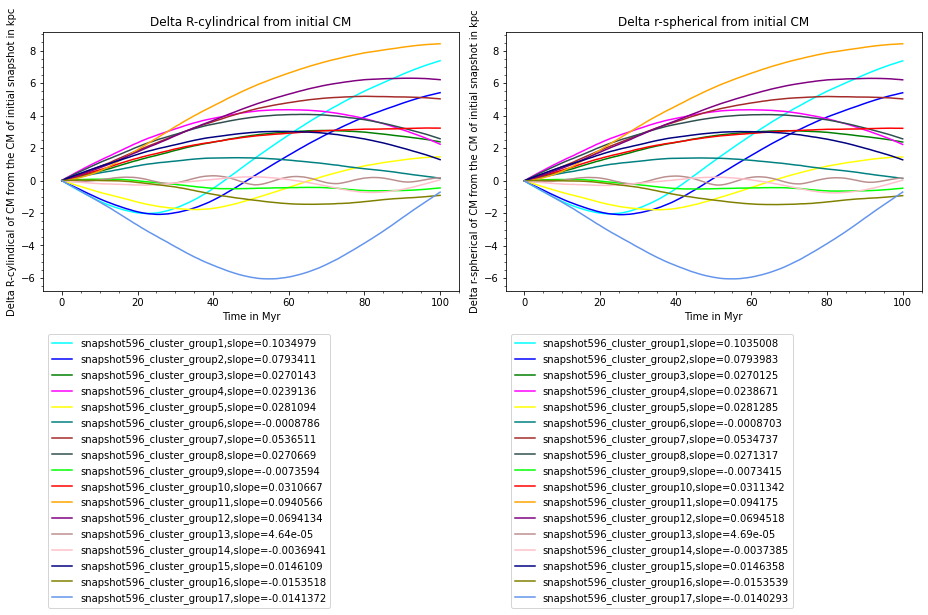

In [37]:
#########################################################
#########################################################
#delta_r_and_R_from_initial_position_of_distance_of_CM_from_galactic_center_all_clusters (in kpc)
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red']
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
fig12=plt.figure(figsize=(13,9))
ax1=fig12.add_subplot(1,2,1)
ax2=fig12.add_subplot(1,2,2)
ax1.minorticks_on()
ax1.set_xlabel('Time in Myr')
ax1.set_ylabel('Delta R-cylindical of CM from the CM of initial snapshot in kpc')
ax1.set_title("Delta R-cylindrical from initial CM")

ax2.minorticks_on()
ax2.set_xlabel('Time in Myr')
ax2.set_ylabel('Delta r-spherical of CM from the CM of initial snapshot in kpc')
ax2.set_title("Delta r-spherical from initial CM")
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshots to plot
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from
n=snapshot_end-snapshot_start+1
cluster_count=0

for i in range(len(cluster_groupid)):
    delta_R_cm_temp=np.array(0)
    delta_r_cm_temp=np.array(0)
    snapshot_count=snapshot_start
    xcm_initial=importdata[snapshot_start][cluster_count+1]["xcm"]
    ycm_initial=importdata[snapshot_start][cluster_count+1]["ycm"]
    zcm_initial=importdata[snapshot_start][cluster_count+1]["zcm"]
    R_cm_initial=(xcm_initial**2+ycm_initial**2)**(1/2) 
    r_cm_initial=(xcm_initial**2+ycm_initial**2+zcm_initial**2)**(1/2) 
    print("This is r, R and the difference between the spherical and cylindrial i.e. r-R")
    print(r_cm_initial,R_cm_initial,r_cm_initial-R_cm_initial)
    for j in range(n):
        xcm=importdata[snapshot_count][cluster_count+1]["xcm"]
        ycm=importdata[snapshot_count][cluster_count+1]["ycm"]
        zcm=importdata[snapshot_count][cluster_count+1]["zcm"]
        R=(xcm**2+ycm**2)**(1/2) 
        r=(xcm**2+ycm**2+zcm**2)**(1/2) 
        delta_R_cm_temp=np.append(delta_R_cm_temp,R-R_cm_initial)
        delta_r_cm_temp=np.append(delta_r_cm_temp,r-r_cm_initial)
        snapshot_count+=1
    delta_R_cm=delta_R_cm_temp[1:len(delta_R_cm_temp)]
    delta_r_cm=delta_r_cm_temp[1:len(delta_r_cm_temp)]
    
    slope_R, intercept_R = np.polyfit(time,delta_R_cm, 1)
    slope_r, intercept_r = np.polyfit(time,delta_r_cm, 1)
    ax1.plot(time,delta_R_cm,label=cluster_groupid[cluster_count]+",slope="+str(round(slope_R,7)),c=colors[cluster_count])
    ax2.plot(time,delta_r_cm,label=cluster_groupid[cluster_count]+",slope="+str(round(slope_r,7)),c=colors[cluster_count])
    
    ax1.legend(bbox_to_anchor=(0,-0.15), loc='upper left')
    ax2.legend(bbox_to_anchor=(0,-0.15), loc='upper left')
    cluster_count+=1
plt.tight_layout()    
fig12.savefig(plot_path+"delta_r_and_R_from_initial_position_of_distance_of_CM_from_galactic_center_all_clusters.png",dpi=150)
#########################################################
#########################################################